In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head() #untuk liat data dari atas

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
data[data.duplicated()] # tampilkan hanya baris duplikasi sekunder

,User ID,Gender,Age,EstimatedSalary,Purchased


In [5]:
#data.drop("User ID",1,inplace=True)

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
#data['Gender'] = labelencoder.fit_transform(data['Gender'])

In [8]:
data.head() # gender 1 = male, gender 0= female

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Split data (pemisahan data)

In [ ]:
#X = data.drop(columns='Purchased') #feature
X = data.iloc[:, [2,3]].values
y = data.iloc[:, -1].values #label

X

In [ ]:
y

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

### feature scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

### KNN Model

In [49]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors= 3, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train) #jalankan model

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



<ipython-input-54-6bb3a51d82cb>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  for i, j in enumerate (np.unique(y_set)): plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], c = ListedColormap(('red','green'))(i), label = j)


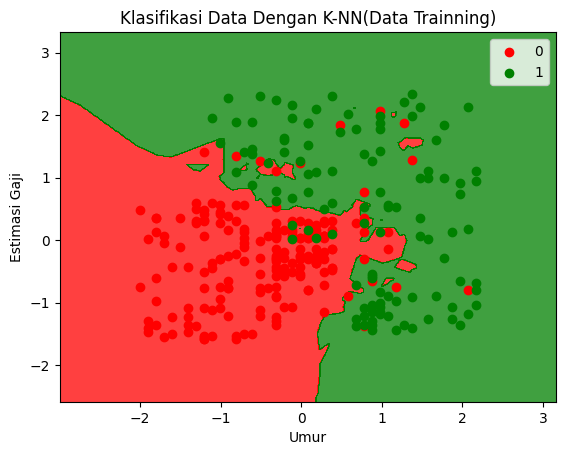

In [54]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop= x_set[:, 0].max() + 1, step=0.01),np.arange(start = x_set[:, 1].min()-1, stop= x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)): plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Klasifikasi Data Dengan K-NN(Data Trainning)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()
